<a href="https://colab.research.google.com/github/eteh1/Sales-Forecasting/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

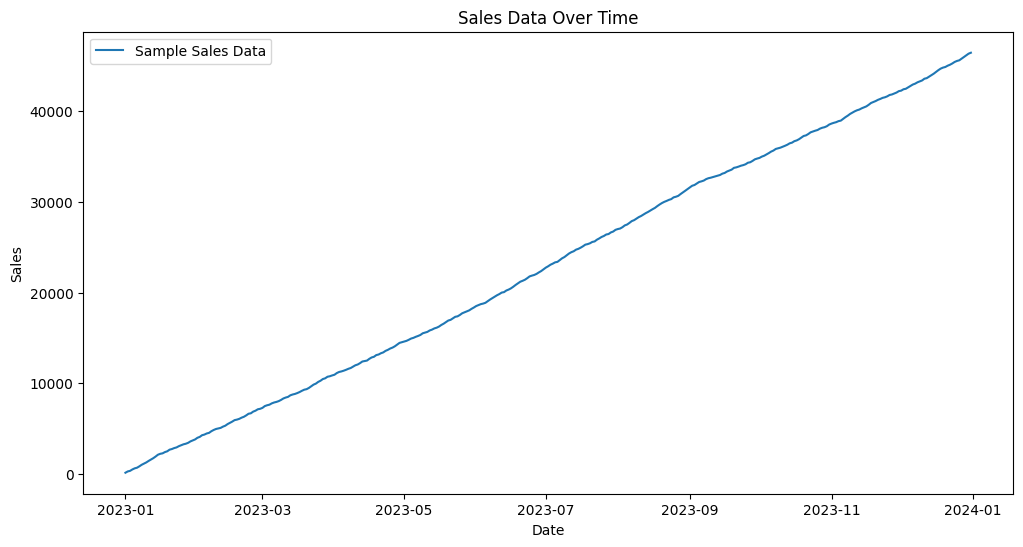

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Absolute Error: 456.7150244122383


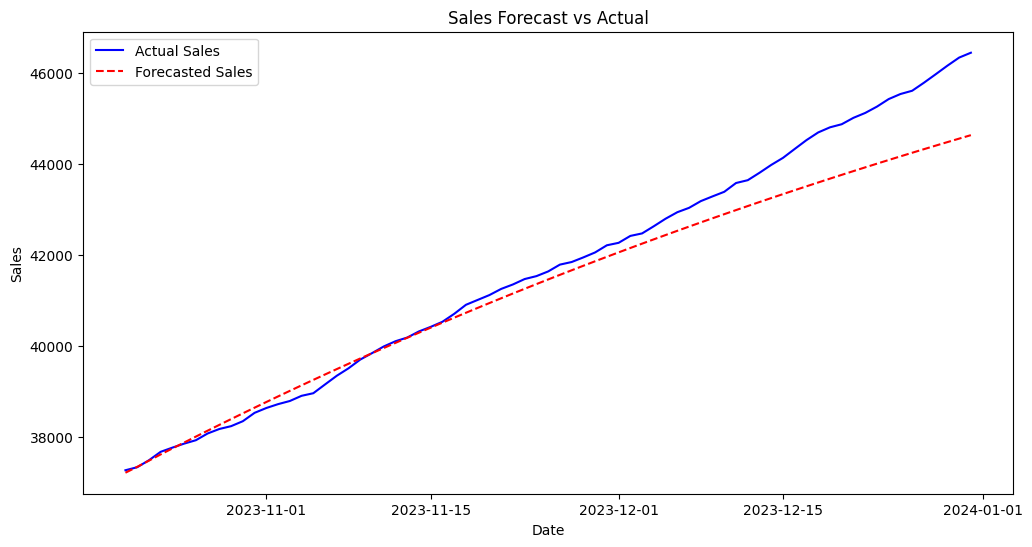

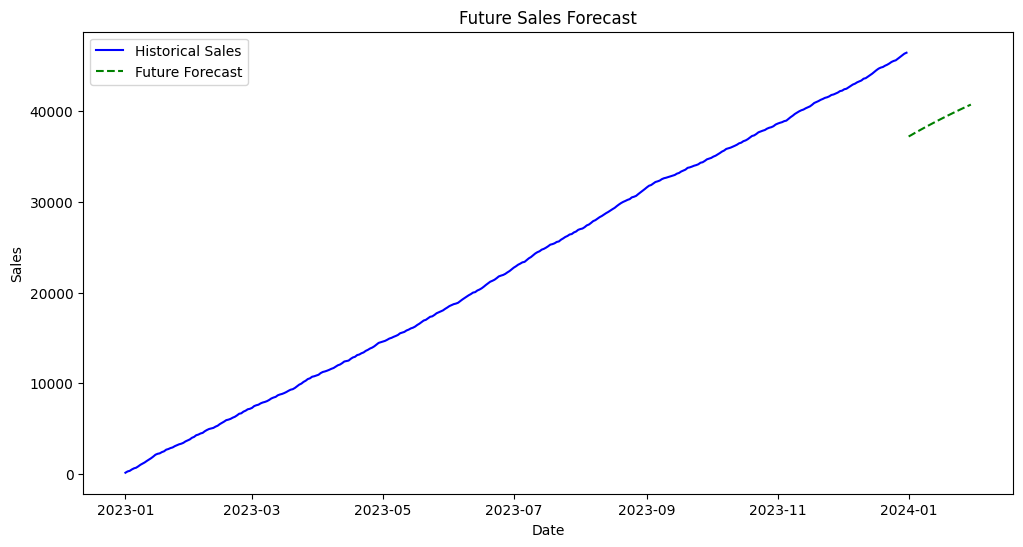

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Generate Sample Sales Data
np.random.seed(42)
date_range = pd.date_range(start="2023-01-01", periods=365, freq='D')
sales = np.cumsum(np.random.randint(50, 200, size=len(date_range)))  # Simulated increasing sales trend

# Create a DataFrame
df = pd.DataFrame({'Date': date_range, 'Sales': sales})
df.set_index('Date', inplace=True)

# Plot the sample sales data
plt.figure(figsize=(12, 6))
plt.plot(df, label='Sample Sales Data')
plt.title('Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Splitting data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA Model
order = (5, 1, 0)  # Adjust based on ACF and PACF plots
model = ARIMA(train, order=order)
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error: {mae}")

# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Sales', color='blue')
plt.plot(test.index, forecast, label='Forecasted Sales', color='red', linestyle='dashed')
plt.title('Sales Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Future Predictions
future_steps = 30  # Forecast next 30 days
future_forecast = model_fit.forecast(steps=future_steps)

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df, label='Historical Sales', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=future_steps+1, freq='D')[1:], future_forecast,
         label='Future Forecast', color='green', linestyle='dashed')
plt.title('Future Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

